In [3]:
# 导入包

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
pass

In [27]:
# 倒入并查看数据
crecreditcard_data=pd.read_csv('./creditcard.csv')
crecreditcard_data.shape,crecreditcard_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

((284807, 31), None)

In [28]:
crecreditcard_data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


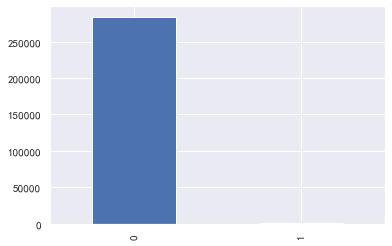

In [29]:
# 看看欺诈与非欺诈的比例如何
count_classes=pd.value_counts(crecreditcard_data['Class'],sort=True).sort_index()

# 统计下具体数据
count_classes.value_counts()
# 也可以用count_classes[0],count_classes[1]看分别数据
count_classes.plot(kind='bar')
plt.show()

In [30]:
#0代表正常，1代表欺诈，二者数量严重失衡,极度不平衡，根本不在一个数量级上；

In [31]:
# 查看二者的描述性统计,与时间的序列分布关系
print('Normal')
print(crecreditcard_data.
      Time[crecreditcard_data.Class == 0].describe())
print('-'*25)
print('Fraud')
print(crecreditcard_data.
      Time[crecreditcard_data.Class == 1].describe())

Normal
count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64
-------------------------
Fraud
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64


In [32]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei',font_scale=1)  # 解决Seaborn中文显示问题并调整字体大小

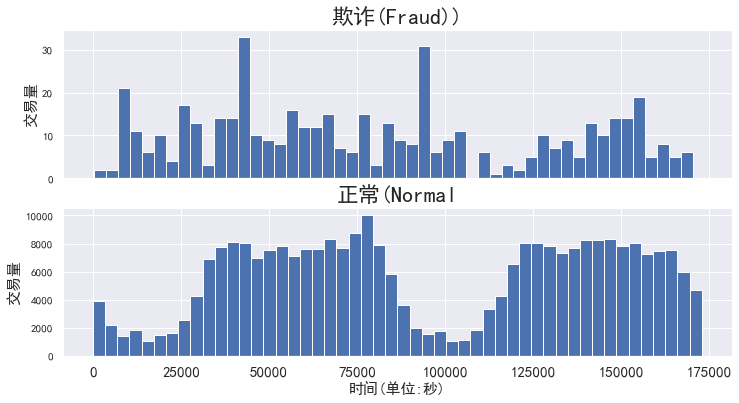

In [34]:
f,(ax1,ax2)=plt.subplots(2,1,sharex=True,figsize=(12,6))
bins=50
ax1.hist(crecreditcard_data.Time[crecreditcard_data.Class == 1],bins=bins)
ax1.set_title('欺诈(Fraud))',fontsize=22)
ax1.set_ylabel('交易量',fontsize=15)

ax2.hist(crecreditcard_data.Time[crecreditcard_data.Class == 0],bins=bins)
ax2.set_title('正常(Normal',fontsize=22)

plt.xlabel('时间(单位:秒)',fontsize=15)
plt.xticks(fontsize=15)

plt.ylabel('交易量',fontsize=15)
# plt.yticks(fontsize=22)
plt.show()

欺诈与金额Amount的关系和分布情况

In [25]:
print('欺诈')
print(crecreditcard_data.Amount[crecreditcard_data.Class ==1].describe())
print('-'*25)
print('正常交易')
print(crecreditcard_data.Amount[crecreditcard_data.Class==0].describe())

欺诈
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
-------------------------
正常交易
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


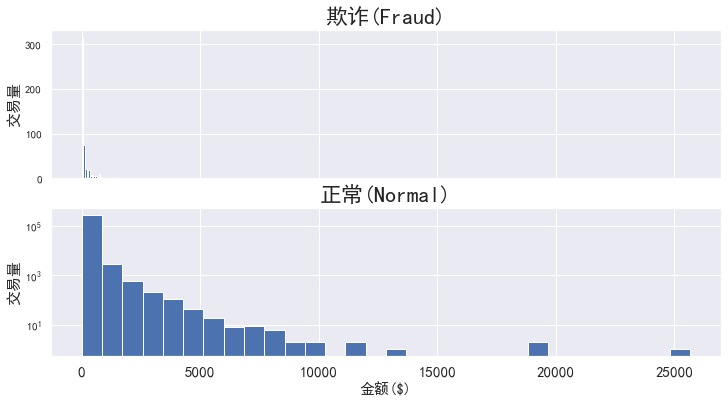

In [26]:
f,(ax1,ax2)=plt.subplots(2,1,sharex=True,figsize=(12,6))
bins=30
ax1.hist(crecreditcard_data.Amount[crecreditcard_data.Class == 1],bins=bins)
ax1.set_title('欺诈(Fraud)',fontsize=22)
ax1.set_ylabel('交易量',fontsize=15)

ax2.hist(crecreditcard_data.Amount[crecreditcard_data.Class == 0],bins=bins)
ax2.set_title('正常(Normal)',fontsize=22)

plt.xlabel('金额($)',fontsize=15)
plt.xticks(fontsize=15)

plt.ylabel('交易量',fontsize=15)
plt.yscale('log')
plt.show()

查看各个自变量(V1 ~V29)与因变量的关系
看看各个变量与正常、欺诈之间是否存在联系，为了更直观展示，通过distplot图来逐个判断，如下：

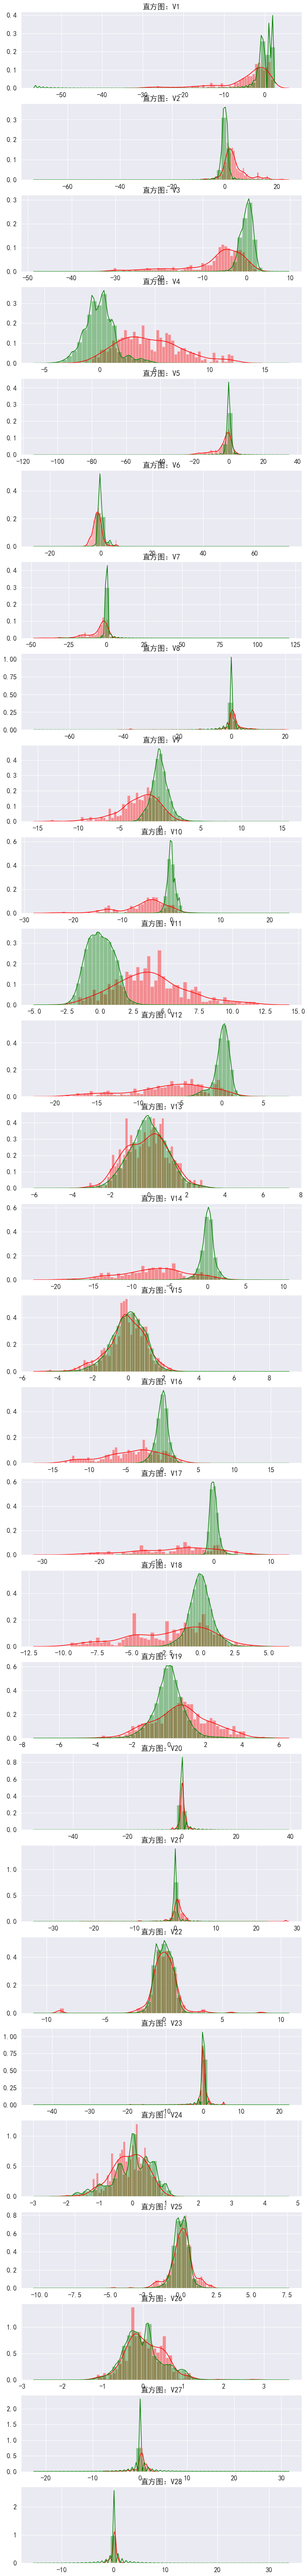

In [13]:
features=[x for x in crecreditcard_data.columns 
            if x not in ['Time','Amount','Class']]
plt.figure(figsize=(12,28*4))
gs =gridspec.GridSpec(28,1)

import warnings
warnings.filterwarnings('ignore')
for i,cn in enumerate(crecreditcard_data[features]):
    ax=plt.subplot(gs[i])
    sns.distplot(crecreditcard_data[cn][crecreditcard_data.Class==1],bins=50,color='red')
    sns.distplot(crecreditcard_data[cn][crecreditcard_data.Class==0],bins=50,color='green')
    ax.set_xlabel('')
    ax.set_title('直方图：'+str(cn))
plt.savefig('各个变量与class的关系.png',transparent=False,bbox_inches='tight')
plt.show()

建模并分析


本部分将应用逻辑回归、随机森林建模分析，分别展开如下：

In [14]:
# 先把数据分为欺诈组和正常组，然后按比例生产训练和测试数据集
# 分组
Fraud=crecreditcard_data[crecreditcard_data.Class == 1]
Normal=crecreditcard_data[crecreditcard_data.Class == 0]

# 训练特征集
x_train=Fraud.sample(frac=0.7)
x_train=pd.concat([x_train,Normal.sample(frac=0.7)],axis=0)
# 测试特征集
x_test=crecreditcard_data.loc[~crecreditcard_data.index.isin(x_train.index)]

# 标签集
y_train=x_train.Class
y_test=x_test.Class

# 去掉特征集里的标签和时间列
x_train=x_train.drop(['Class','Time'],axis=1)
x_test=x_test.drop(['Class','Time'],axis=1)
# 查看数据结构
print(x_train.shape,y_train.shape,
      '\n',x_test.shape,y_test.shape)

(199364, 29) (199364,) 
 (85443, 29) (85443,)


In [15]:
x_train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

6.1 逻辑回归方法

In [16]:
from sklearn import metrics
import scipy.optimize as op
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import (precision_recall_curve,
                             auc,roc_auc_score,
                             roc_curve,recall_score,
                             classification_report)

lrmodel = LogisticRegression(penalty='l2')
lrmodel.fit(x_train, y_train)

#查看模型
print('lrmodel')
print(lrmodel)
lrmodel
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#查看混淆矩阵
ypred_lr=lrmodel.predict(x_test)
print('confusion_matrix')
print(metrics.confusion_matrix(y_test,ypred_lr))

lrmodel
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
confusion_matrix
[[85279    16]
 [   63    85]]


In [17]:
#查看分类报告
print('classification_report')
print(metrics.classification_report(y_test,ypred_lr))

classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.84      0.57      0.68       148

    accuracy                           1.00     85443
   macro avg       0.92      0.79      0.84     85443
weighted avg       1.00      1.00      1.00     85443



In [18]:
#查看预测精度与决策覆盖面
print('Accuracy:%f'%(metrics.accuracy_score(y_test,ypred_lr)))
print('Area under the curve:%f'%(metrics.roc_auc_score(y_test,ypred_lr)))

Accuracy:0.999075
Area under the curve:0.787068


6.2 随机森林模型

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfmodel=RandomForestClassifier()
rfmodel.fit(x_train,y_train)

#查看模型
print('rfmodel')
rfmodel
rfmodel
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#查看混淆矩阵
ypred_rf=rfmodel.predict(x_test)
print('confusion_matrix')
print(metrics.confusion_matrix(y_test,ypred_rf))

rfmodel
confusion_matrix
[[85288     7]
 [   35   113]]


In [20]:
#查看分类报告
print('classification_report')
print(metrics.classification_report(y_test,ypred_rf))

classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.94      0.76      0.84       148

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [21]:
#查看预测精度与决策覆盖面
print('Accuracy:%f'%(metrics.accuracy_score(y_test,ypred_rf)))
print('Area under the curve:%f'%(metrics.roc_auc_score(y_test,ypred_rf)))

Accuracy:0.999508
Area under the curve:0.881716


In [22]:
import joblib
# 保存模型
joblib.dump(rfmodel, "./score_card/anti-fraud-rf.model")
# 加载模型
#estimator = joblib.load("my_ridge.pkl")

['./score_card/anti-fraud-rf.model']

分数转换

一般来说我们通过模型预测得到的概率指需要通过分数转换转化为具体的评分，例如
1. 芝麻分的分值范围为350～950，分值越高代表信用越好，相应违约率相对较低，较高的芝麻分可以帮助用户获得更高效、更优质的服务。
2. FICO分的分值范围为300～850，分数越高, 说明客户的信用风险越小。
而不是直接使用概率值，关于评分卡的转换

我们将客户违约的概率表示为p，则正常的概率为1-p。因此，可以设：
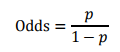

此时，客户违约的概率p可表示为：
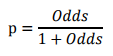

评分卡设定的分值刻度可以通过将分值表示为比率对数的线性表达式来定义，即可表示为下式：
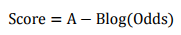

其中，A和B是常数。式中的负号可以使得违约概率越低，得分越高。通常情况下，这是分值的理想变动方向，即高分值代表低风险，低分值代表高风险。

式中的常数A、B的值可以通过将两个已知或假设的分值带入计算得到。通常情况下，需要设定两个假设：

（1）给某个特定的比率设定特定的预期分值；

（2）确定比率翻番的分数（PDO）（point of double odds）



根据以上的分析，我们首先假设比率为x的特定点的分值为P。则比率为2x的点的分值应该为P-PDO。代入式中，可以得到如下两个等式：
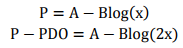

假设我们期望x=(bad/good)=5%时的分值为50分，PDO为10分(即每增加10分bad/good比例就会缩减一半)，代入式中求得：

50=A-B*log(0.05)

50-10=A-B*log(0.1)

计算得到：

B=14.43，A=6.78，


评分卡刻度参数A和B确定以后，就可以计算比率和违约概率，以及对应的分值了。






到这里为止就得到了一个评分卡，当然逻辑回归可以进一步根据woe转化成为更细致的评分卡可见下。

如果是gbdt，神经网络系列的算法，只能到这一步就结束了。方法就是计算得到概率然后把概率转化为Odds的值，然后按照上述操作下来即可。无法得到lr的这种标准评分卡：

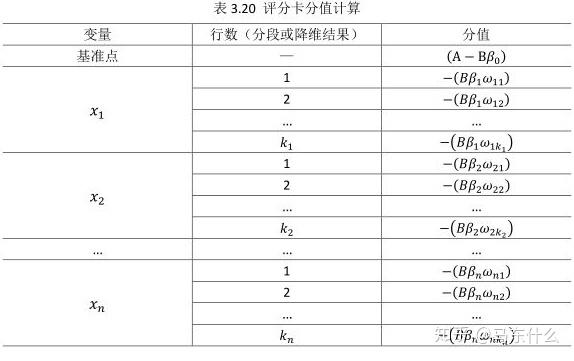